# Dados e Aprendizagem Automática
### Part IX

## **DBSCAN using Blobs Dataset - III**

#### Imports

In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

#### Create the dataset using Blobs

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y = make_blobs(n_samples=750,cluster_std=0.4,random_state=0)

##### Shape of X and y

In [4]:
X.shape

(750, 2)

In [5]:
y.shape

(750,)

#### Visualize the data

View the first 5 lines of the data set:

In [6]:
print('X:',X[0:5,:])
print('y:',y[0:5])

X: [[ 2.36434546  0.23302434]
 [ 0.92311785  4.18467098]
 [ 1.64221028  0.72296432]
 [ 1.97590796  0.93534058]
 [-1.68752703  2.73049184]]
y: [1 0 1 1 2]


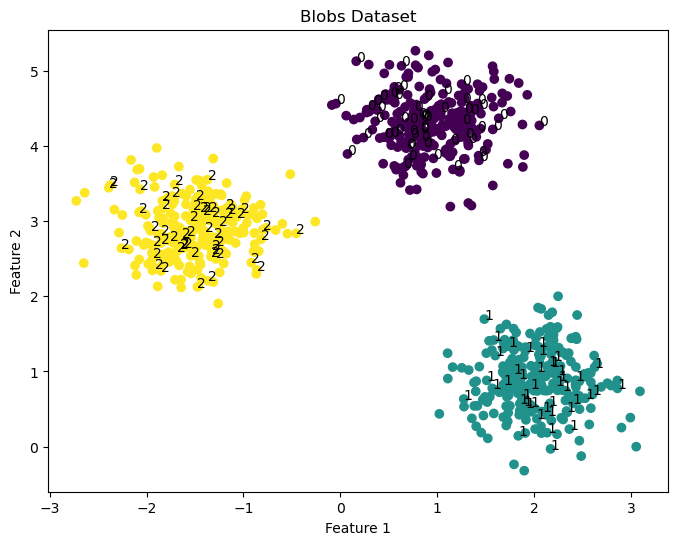

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0],X[:,1], c= y, cmap = 'viridis')
for i, txt in enumerate(y):
    if i%5 == 0:
        plt.annotate(txt, ((X[i,0],X[i,1])))
plt.title('Blobs Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### Determine the $\epsilon$ parameter

We use the *k*-distance graph method to help choose an appropriate $\epsilon$ value:
1. We define a function <code>plot_k_distance_graph</code> that calculates the distance to the $k^{th}$ nearest neighbor for each point.
2. The distances are sorted and plotted.
3. We look for an "elbow" in the resulting graph to choose $\epsilon$.

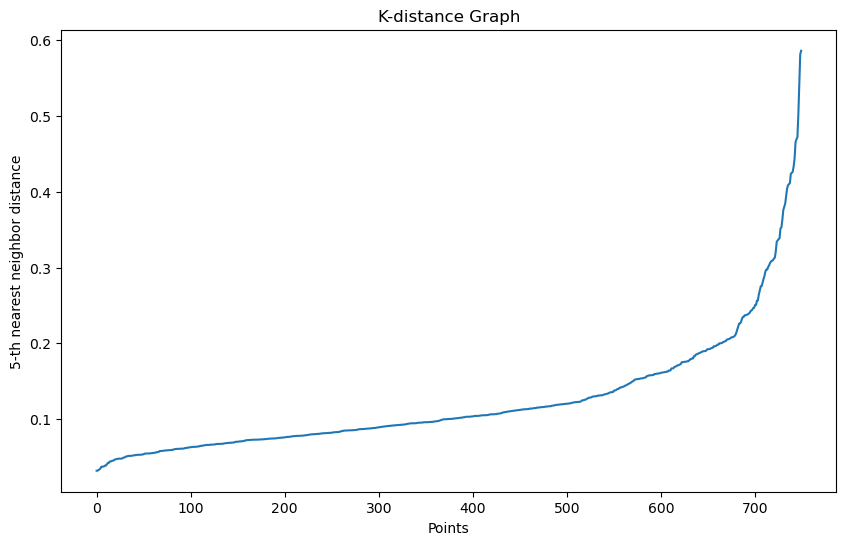

In [10]:
from sklearn.neighbors import NearestNeighbors

def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
plot_k_distance_graph(X,k=5)

### Create the clusters

#### With DBSCAN
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


<code>sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)</code>

In [11]:
from sklearn.cluster import DBSCAN

In [13]:
db = DBSCAN(eps=0.2,min_samples=10)

In [15]:
db.fit(X)

DBSCAN(eps=0.2, min_samples=10)

Confirm the associated labels shape

In [16]:
labels = db.labels_
labels.shape

(750,)

In [17]:
labels

array([-1,  0,  1,  1,  2, -1,  0, -1,  2, -1,  1, -1,  1, -1,  0,  1,  2,
       -1,  0, -1,  1,  1,  2,  1,  0,  0,  2,  2,  1,  1,  2,  1,  1,  1,
        0,  0,  2, -1,  0, -1,  2,  2,  1,  0, -1,  2,  0,  0,  2,  2,  0,
       -1,  2,  1,  2,  1,  1,  0,  0,  1,  2,  1,  0, -1,  2,  1,  2,  0,
        0,  2,  2,  2,  1, -1,  1,  2,  2,  1,  2, -1,  1,  0, -1,  0,  2,
       -1,  0,  0,  2,  2,  2,  0,  1,  1,  0,  2,  1,  2,  0,  0,  0,  0,
        0,  0,  1,  1,  2,  2,  1,  2,  0,  2,  1,  2,  1,  2,  1,  0,  1,
        0,  0,  1,  2,  1,  2,  2,  2,  0,  2, -1,  2,  2,  2,  1,  0,  2,
        0,  0,  0,  0,  1,  2,  2, -1,  1, -1,  2,  1,  1,  1,  2,  1, -1,
        1,  2,  2,  2, -1,  2,  0,  1,  2,  0,  1,  0,  2,  0,  2,  0,  1,
        0,  0,  0,  2,  2,  1,  2, -1,  2,  1,  0,  2,  2,  2,  2,  2,  1,
        2, -1,  2,  0,  1,  2,  0, -1,  2,  1,  1,  1,  0,  2,  0, -1,  2,
        2,  2,  0,  1,  1,  2,  1,  2,  1, -1,  1,  0, -1,  1,  0, -1,  0,
       -1,  2,  0,  2,  0

##### Interpret the results

Indices of core samples

In [18]:
db.core_sample_indices_

array([  1,   2,   3,   4,   6,   8,  10,  12,  14,  15,  16,  18,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  32,  33,  34,
        35,  36,  40,  43,  46,  47,  48,  49,  52,  57,  58,  59,  60,
        61,  62,  65,  66,  67,  68,  69,  70,  71,  72,  74,  75,  76,
        78,  80,  83,  84,  86,  87,  89,  90,  92,  93,  94,  95,  96,
        97,  98, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 125, 127, 128,
       130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 144, 146,
       147, 149, 150, 151, 153, 154, 155, 156, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191,
       192, 193, 196, 197, 198, 199, 201, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 214, 215, 217, 218, 220, 222, 225, 226, 227, 228,
       229, 230, 231, 232, 234, 235, 236, 238, 239, 240, 241, 24

Componentes

In [19]:
db.components_

array([[0.92311785, 4.18467098],
       [1.64221028, 0.72296432],
       [1.97590796, 0.93534058],
       ...,
       [1.04724054, 4.14307495],
       [2.16897939, 1.59473117],
       [0.73774446, 4.28276041]])

No. of features

In [20]:
db.n_features_in_

2

Number of clusters in *labels* (ignoring noise if present)

In [22]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [24]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 104


Obtain predictions

In [26]:
pred = db.fit_predict(X)

In [27]:
pred

array([-1,  0,  1,  1,  2, -1,  0, -1,  2, -1,  1, -1,  1, -1,  0,  1,  2,
       -1,  0, -1,  1,  1,  2,  1,  0,  0,  2,  2,  1,  1,  2,  1,  1,  1,
        0,  0,  2, -1,  0, -1,  2,  2,  1,  0, -1,  2,  0,  0,  2,  2,  0,
       -1,  2,  1,  2,  1,  1,  0,  0,  1,  2,  1,  0, -1,  2,  1,  2,  0,
        0,  2,  2,  2,  1, -1,  1,  2,  2,  1,  2, -1,  1,  0, -1,  0,  2,
       -1,  0,  0,  2,  2,  2,  0,  1,  1,  0,  2,  1,  2,  0,  0,  0,  0,
        0,  0,  1,  1,  2,  2,  1,  2,  0,  2,  1,  2,  1,  2,  1,  0,  1,
        0,  0,  1,  2,  1,  2,  2,  2,  0,  2, -1,  2,  2,  2,  1,  0,  2,
        0,  0,  0,  0,  1,  2,  2, -1,  1, -1,  2,  1,  1,  1,  2,  1, -1,
        1,  2,  2,  2, -1,  2,  0,  1,  2,  0,  1,  0,  2,  0,  2,  0,  1,
        0,  0,  0,  2,  2,  1,  2, -1,  2,  1,  0,  2,  2,  2,  2,  2,  1,
        2, -1,  2,  0,  1,  2,  0, -1,  2,  1,  1,  1,  0,  2,  0, -1,  2,
        2,  2,  0,  1,  1,  2,  1,  2,  1, -1,  1,  0, -1,  1,  0, -1,  0,
       -1,  2,  0,  2,  0

In [28]:
y

array([1, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1, 1,
       2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1,
       2, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0,
       2, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1,
       2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 1,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1,
       1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1,
       0, 0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 2, 0,
       0, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 0,
       0, 2, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2,

##### Visualize the resultant clusters

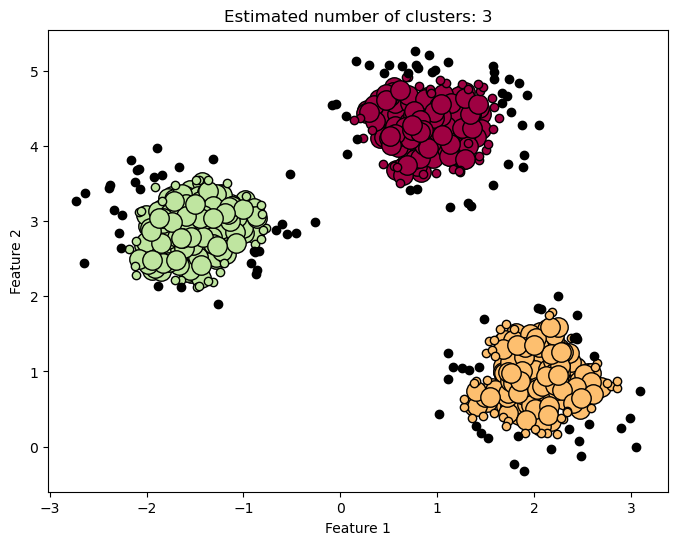

In [30]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

plt.figure(figsize=(8, 6))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,)
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

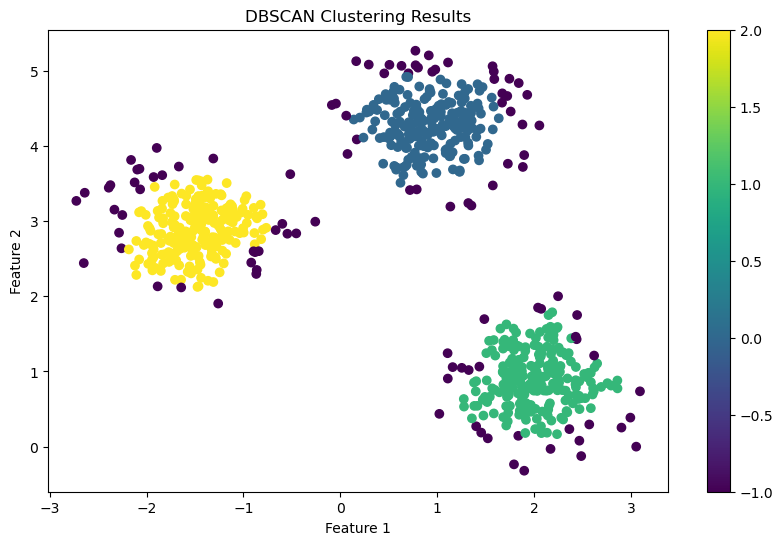

In [31]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:,0],X[:,1],c=pred, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### Evaluate the model

##### Visualize the original vs. DBSCAN clusters

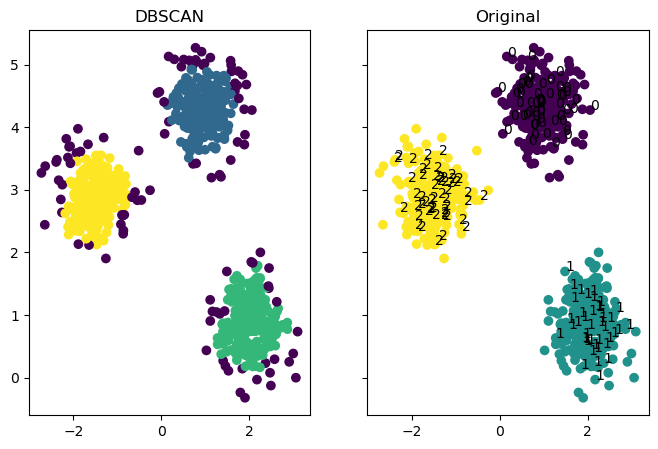

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(8,5))
ax1.set_title('DBSCAN')
ax1.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap = 'viridis')
ax2.set_title("Original")
ax2.scatter(X[:, 0], X[:, 1], c=y, cmap = 'viridis')
for i, txt in enumerate(y):
    if i%5 == 0:
        plt.annotate(txt, (X[i, 0], X[i, 1]))
plt.savefig("DBSCAN.png")
plt.show()

Because *Blobs* provides the true labels, we can analyze through the following metrics: homogeneity, completeness, V-measure, Adjusted Rand Index, Adjusted Mutual Information and Silhouette Coefficient

In [39]:
print(f"Homogeneity: {metrics.homogeneity_score(y, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.862
Completeness: 0.702
V-measure: 0.774
Adjusted Rand Index: 0.781
Adjusted Mutual Information: 0.773
Silhouette Coefficient: 0.586


In [40]:
print(confusion_matrix(y, pred))

[[  0   0   0   0]
 [ 39 211   0   0]
 [ 31   0 219   0]
 [ 34   0   0 216]]


In [41]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.84      0.92       250
           1       1.00      0.88      0.93       250
           2       1.00      0.86      0.93       250

    accuracy                           0.86       750
   macro avg       0.75      0.65      0.69       750
weighted avg       1.00      0.86      0.93       750



/home/eduardoascunha/miniconda3/envs/envTP9/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eduardoascunha/miniconda3/envs/envTP9/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eduardoascunha/miniconda3/envs/envTP9/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

#### Compare DBSCAN and K-Means

/home/eduardoascunha/miniconda3/envs/envTP9/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


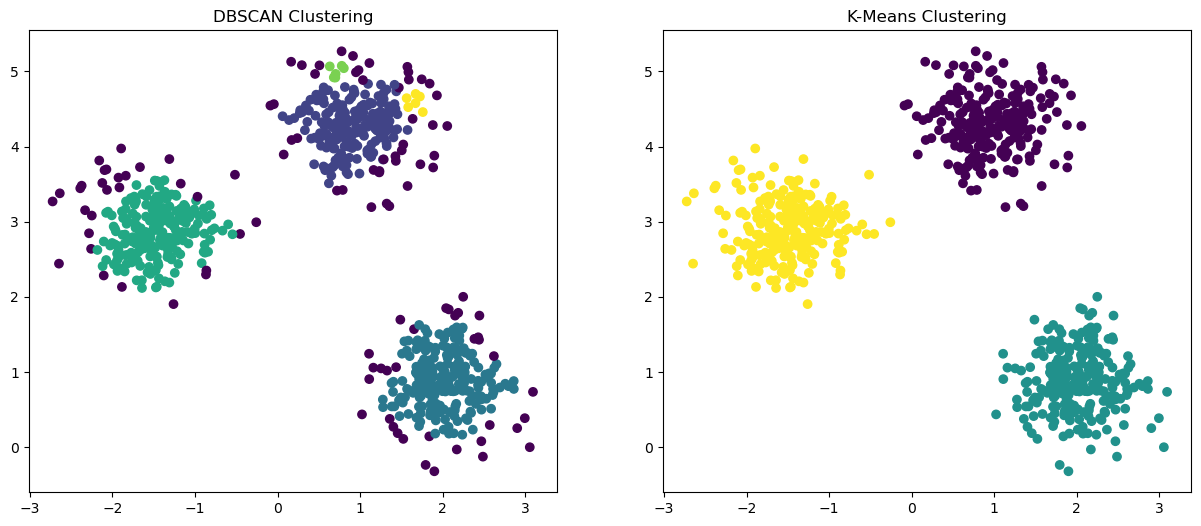

In [43]:
from sklearn.cluster import KMeans

dbscan = DBSCAN(eps=0.15,min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

kmeans = KMeans(n_clusters=3,random_state=42)
kmeans_labels = kmeans.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
ax1.set_title('DBSCAN Clustering')
ax2.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
ax2.set_title('K-Means Clustering')
plt.show()